In [1]:
import pandas as pd
import numpy as np
import yaml
import networkx as nx
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
from dag_gettsim.dag import compute_taxes_and_transfers

In [3]:
from gettsim.pre_processing.policy_for_date import get_policies_for_date

In [4]:
df = pd.read_csv("gettsim/tests/test_dfs_ssc.csv")
params = yaml.safe_load(
    Path("gettsim", "soz_vers_beitr.yaml").read_text(encoding="utf-8")
)

In [10]:
df.columns

Index(['hh_id', 'tu_id', 'p_id', 'bruttolohn_m', 'wohnort_ost', 'alter',
       'selbstständig', 'hat_kinder', 'eink_selbstst_m', 'ges_rente_m',
       'prv_krankv_beit_m', 'jahr', 'sozialv_beit_m', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'bemes', 'rentenv_beit_m',
       'pflegev_beit_m', 'ges_krankv_beit_m', 'arbeitsl_v_beit_m',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [7]:
np.select([df["wohnort_ost"], ~df["wohnort_ost"]], [2, 3])

array([3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3])

In [8]:
df["wohnort_ost"]

0     False
1     False
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12    False
13    False
14    False
Name: wohnort_ost, dtype: bool

In [9]:
year_df = df.query("jahr == 2002")

In [10]:
year_params = get_policies_for_date(year=2002, group="soz_vers_beitr", raw_group_data=params)

In [11]:
data, dag = compute_taxes_and_transfers(
    dict(year_df), params=year_params, targets=["sozialv_beit_m"], return_dag=True)

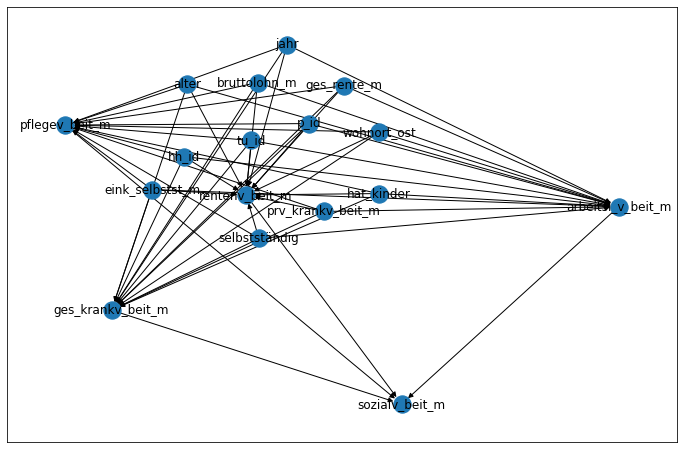

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

nx.draw_networkx(dag, ax=ax)
